Jan 14 ,Thr, 2021 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 인공지능(AI)에서 취하는 방식

## Cost(MSE) Test
- (실제값 -  예측값)**2

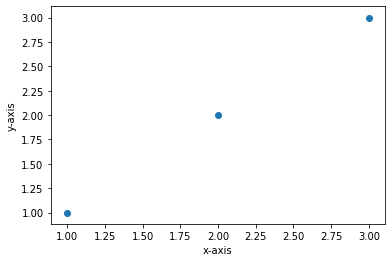

In [14]:
plt.scatter( x_data, y_data )
plt.xlabel( 'x-axis' )
plt.ylabel( 'y-axis' )
plt.show()

In [10]:
x_data = [1,2,3]
y_data = [1,2,3]

### Cost 함수

In [15]:
def cost(x,y,w):
    c = 0 
    for i in np.arange( len(x) ):
        hx = w*x[i]    
        # (w가 -1일때의 y값 - 실제 y값)**2
        c = c + ((hx) - y[i])**2
    return c/len(x)

In [17]:
np.arange( len(x_data) )

array([0, 1, 2])

In [16]:
print( cost(x_data, y_data, -1) ) # w가 -1 -> 기울기가 -1이라고 생각

18.666666666666668


In [18]:
print( cost(x_data, y_data, 0) ) # 1+4+9/3
# w = 0이면 x축과 나란히 

4.666666666666667


In [19]:
print( cost(x_data, y_data, 1) )

0.0


In [20]:
print( cost(x_data, y_data, 2) )

4.666666666666667


In [23]:
np.linspace( 1,10,5 ) # start, end, 갯수( 간격이 동일하게 )

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

-3.0 74.66666666666667
-2.836734693877551 68.69582118561709
-2.673469387755102 62.97376093294461
-2.510204081632653 57.500485908649175
-2.3469387755102042 52.275996112730816
-2.183673469387755 47.3002915451895
-2.020408163265306 42.57337220602526
-1.8571428571428572 38.095238095238095
-1.6938775510204083 33.86588921282799
-1.5306122448979593 29.88532555879495
-1.3673469387755104 26.15354713313897
-1.2040816326530615 22.670553935860067
-1.0408163265306123 19.436345966958214
-0.8775510204081636 16.450923226433435
-0.7142857142857144 13.714285714285717
-0.5510204081632657 11.226433430515067
-0.38775510204081653 8.98736637512148
-0.22448979591836737 6.997084548104957
-0.06122448979591866 5.255587949465504
0.1020408163265305 3.7628765792031107
0.2653061224489792 2.518950437317787
0.4285714285714284 1.5238095238095248
0.5918367346938771 0.7774538386783302
0.7551020408163263 0.27988338192419887
0.9183673469387754 0.031098153547133207
1.0816326530612246 0.031098153547133207
1.2448979591836729 

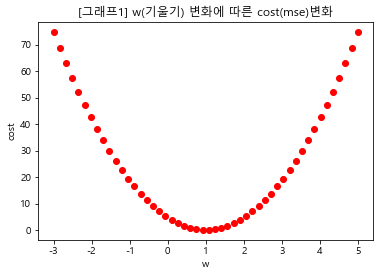

In [70]:
plt.title( '[그래프1] w(기울기) 변화에 따른 cost(mse)변화')
plt.xlabel('w')
plt.ylabel('cost')
for w in np.linspace(-3,5,50):
    c = cost( x_data, y_data, w)
    print( w, c)
    plt.plot( w, c, 'ro') # x축, y축
plt.show()

## 미분(접선의 기울기 )

- y = 2   : 기울기 0
- y = x   : 기울기 1
- y = 2x  : 기울기 2 
- y = x^2 : 기울기 2x


- **합성 함수**의 **미분**

### w(기울기), b(절편)를 구하는 방법
- 공식
- 학습
    - w 구하는 방식
        - w 초기값을 부여 ex) w=5
            - 딥러닝에선 랜덤하게 준다
        - w = w - a(learning mate)*미분
        - 이 과정을 반복( 몇 번 반복할지는 정해진게 없다 )

### 합성함수의 미분 함수
- 인공지능, 딥러닝에서 많이 사용되기 때문에 알아두기

In [38]:
# GD : cost함수를 미분한 값 
# 그래프1 접선의 기울기 값
def gradient_descent( x,y,w ):
    c = 0
    for i in range(len(x)):
        hx = w*x[i] # w에 대한 y값(예측값)
        c = c + (hx-y[i]) *x[i] #편미분
    return c/len(x)

In [48]:
def show_gradient(x,y,w):
    for i in range(200): # 학습 횟수(200번)
        c = cost(x,y,w) # x,y에 대한 cost 구하기
        print(i,c,w)
        g = gradient_descent(x,y,w) # cost 미분(기울기 도출)
        w = w-0.1*g # w를 줄여나가면서 cost를 최소화하는 w찾기
    print('w:' , w )

In [49]:
show_gradient(x_data, y_data, 10)
# w가 10일 때의 cost값 = 378
# g = w가 10일 때의 미분값(기울기)
# w = w-0.1*g -> w가 줄어든다. 여기서  0.1은 learning mate!!!
# w가 0에 도달하면 w - 0.1*g 값이 변하지 않는다. 
# w가 0에 도달했다는 것은 cost를 최소화 하는 지점에 도달했다는 의미
# 이 지점을 찾기 위해 learning mate를 자의적으로 줘서 w값을 줄여나가는 방식

0 378.0 10
1 107.51999999999998 5.8
2 30.583466666666666 3.56
3 8.69929718518518 2.365333333333333
4 2.47446675489712 1.7281777777777778
5 0.7038483213929583 1.3883614814814815
6 0.2002057447517751 1.2071261234567903
7 0.05694741184050483 1.1104672658436214
8 0.016198374923521403 1.0589158751165981
9 0.004607537756023892 1.0314218000621858
10 0.0013105885172690224 1.0167582933664991
11 0.0003727896226898598 1.008937756462133
12 0.0001060379371206724 1.004766803446471
13 3.0161902114324568e-05 1.002542295171451
14 8.579385490296031e-06 1.0013558907581073
15 2.4403585394623746e-06 1.0007231417376572
16 6.941464290019953e-07 1.000385675593417
17 1.9744609536079287e-07 1.0002056936498225
18 5.616244490256599e-08 1.0001097032799053
19 1.597509543893363e-08 1.0000585084159495
20 4.544027147100321e-09 1.0000312044885065
21 1.292523277397425e-09 1.0000166423938701
22 3.6765106557353845e-10 1.0000088759433974
23 1.0457630309680019e-10 1.0000047338364786
24 2.974614843652282e-11 1.00000252471278

# 회귀분석

## Mean Square Error(MSE)
- ( 예측값 - 실제값 )^2 의 평균값
    - cost : 실제값과 예측값의 차이
- 값이 가장 작도록 회귀선을 긋는 것이 최적

In [8]:
df = pd.read_csv('../data/data3/ch2_scores_em.csv',
                 index_col='student number')
df.head(6)

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60


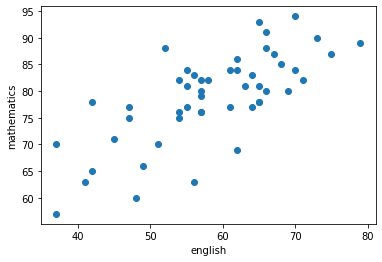

In [7]:
plt.scatter( df['english'], df['mathematics'])
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()

# Scipy로 도출
- 연립방정식 공식으로 도출된 함수
- 트레이닝을 통해 도출된 선형회귀의 기울기, 절편값을 도출한다

In [50]:
import scipy.stats as st

In [54]:
res = st.linregress( df['english'], df['mathematics'])
res

LinregressResult(slope=0.6214230159505968, intercept=42.601324328804154, rvalue=0.7237414863069244, pvalue=2.8760870522821355e-09, stderr=0.08552186247949062)

In [60]:
print( '기울기(w)'   ,res.slope )
print( 'y절편(b)'    ,res.intercept )
print( '상관계수'  ,res.rvalue )
print( 'p-value'   ,res.pvalue )
print( '표준오차'  ,res.stderr )

기울기(w) 0.6214230159505968
y절편(b) 42.601324328804154
상관계수 0.7237414863069244
p-value 2.8760870522821355e-09
표준오차 0.08552186247949062


#### 귀무가설(H0) 
- 영어점수와 수학점수 간에 연관성이 없다
-기울기가 0

#### 대립가설(H1)  
- 영어점수와 수학점수 간에 연관성이 있다
- 기울기가 0이 아니다


- 결론: 회귀계수값( w,b ) 의미가 있는지 없는지를 파악하는 과정
    - p-value가 0.05보다 작으면 귀무가설을 기각, 대립가설을 채택한다.
        - 회귀계수값 w,b가 예측값을 결정하는 선형함수로 사용될 수 있다.
    - p-value가 0.05보다 크면 귀무가설을 채택한다. 

### Q. 영어점수가 70점이면 수학점수는?

In [65]:
res.slope*70 + res.intercept

86.10093544534593

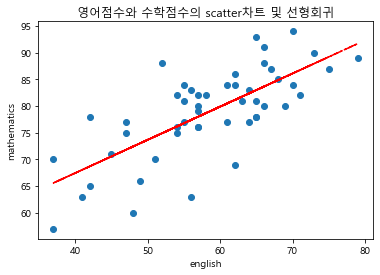

In [68]:
# 선형회귀선 라인차트로 추가하기
plt.scatter( df['english'], df['mathematics'])
plt.title('영어점수와 수학점수의 scatter차트 및 선형회귀')
plt.xlabel('english')
plt.ylabel('mathematics')
lm = res.slope*df['english'] + res.intercept
plt.plot( df['english'], lm, 'r-.' ) # x축, y축
plt.show()